No. of iterations required for convergence:  15320


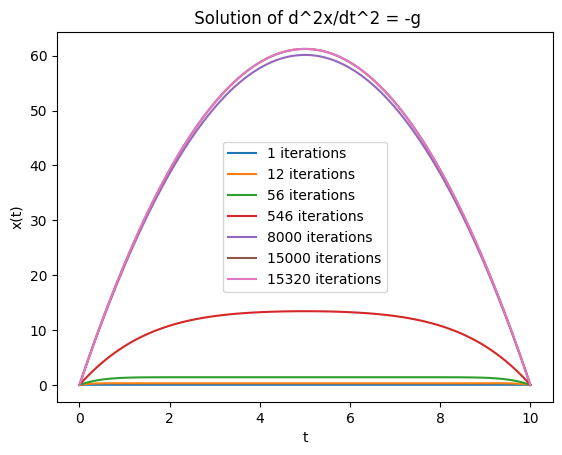

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def relaxation_method(f,a,b,x0,xf,h,tol=1e-4,max_iteration=int(1e6)):
  n=int((b-a)/h)

  x_array=np.zeros(n)
  t_array=np.linspace(a,b,n)
  #x_exact=[50*i-5*i**2 for i in t_array]
  x_array[0]=x0
  x_array[-1]=xf

  x_matrix=np.zeros((max_iteration,len(t_array))) #forming a matrix with all zeros

  x_matrix[0,:]=x_array    #filling first row with two boundary values

  for j in range (1,max_iteration):
    x_array[1:-1]=0.5*(x_array[0:-2]+x_array[2:]-0.5*(h**2)*f(t_array[1:-1],x_array[1:-1]))
    x_matrix[j,:]=x_array

    if np.linalg.norm(x_matrix[j,:]-x_matrix[j-1,:])<tol:
     return t_array,x_matrix[0:j+1],j
  return t_array,x_matrix, "solution does not converge"



def f1(t,x):
  return -10

t_values,x_matrix,iteration=relaxation_method(f1,0,10,0,0,0.1)


print("No. of iterations required for convergence: ", iteration)

iteration_array = [1,12, 56, 546, 8000, 15000, iteration]

for i in iteration_array:
    plt.plot(t_values, x_matrix[i,:], label = f"{i} iterations")

plt.xlabel("t")
plt.ylabel("x(t)")
plt.title(" Solution of d^2x/dt^2 = -g")
plt.legend()
plt.show()


